# Exploring the dataset and predicting CO2 emissions

#### 1. Training dataset and graphs

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# original data
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([62,76,82,78,50,110,52,89,60,94,100,90,66])

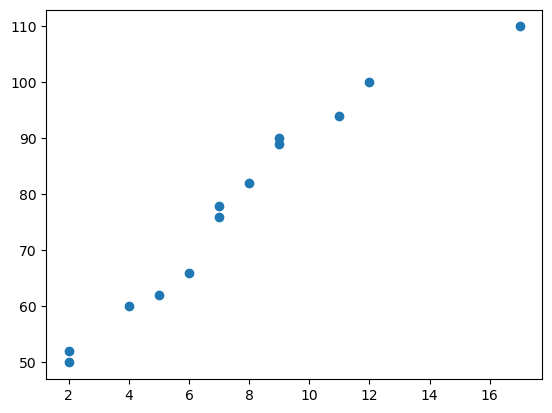

In [2]:
plt.scatter(x, y)
plt.show()

In [3]:
#we are using linear regression model to find needed value of intercept and slope
ls = stats.linregress(x, y)
ls

LinregressResult(slope=4.376747608535688, intercept=44.284768211920536, rvalue=0.9729243941814459, pvalue=2.419506868631989e-08, stderr=0.31348760985488167, intercept_stderr=2.698123645963888)

In [4]:
z = ls.intercept + ls.slope*x

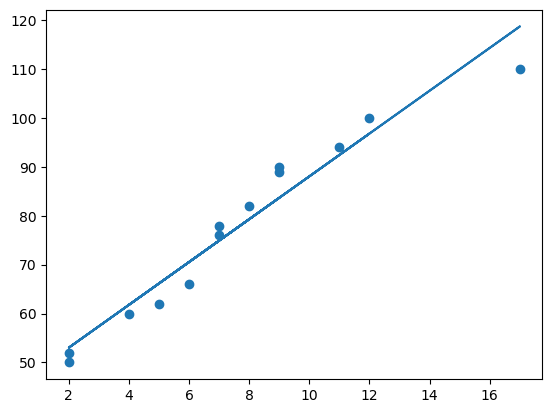

In [5]:
plt.scatter(x, y)
plt.plot(x, z)
plt.show()

#### 2) Main dataset and exploration

In [6]:
import pandas as pd
df = pd.read_csv("data2.csv")
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the regression model
X = df[['Volume', 'Weight']]
y = df['CO2']
model = LinearRegression().fit(X, y)

In [8]:
# Predict the CO2 emissions
y_pred = model.predict(X)

print(y_pred[0:4])

[93.46522516 97.82012716 94.51480683 93.25102045]


In [9]:
# Calculate the MSE
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 33.68279098995153


# Linear Regression

In [10]:
# original data
x=df[["Volume"]]
y=df[["CO2"]]

In [11]:
#Split Dataset for training and testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [12]:
model = LinearRegression().fit(x_train, y_train)

In [13]:
y_pred = model.predict(x_test)
y_pred 


array([[102.07641778],
       [108.04477775],
       [ 94.91438581],
       [108.04477775],
       [ 93.72071382],
       [ 94.91438581],
       [100.88274578],
       [106.85110576],
       [102.07641778]])

### R2 and Mean squared error for linear regression

In [14]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
mse=np.sqrt(mean_squared_error(y_test, y_pred))


In [15]:
mse

7.329143442880126

In [16]:
r2

0.26103535460065674

# Ridge Regression

In [17]:
from sklearn.linear_model import Ridge

#R = Ridge(alpha=0.0001) - the is alpha value by default

#Let's assign the alpha:
R = Ridge(alpha=0.1)

In [18]:
R.fit(x_train, y_train)

Ridge(alpha=0.1)

In [19]:
y_predR = R.predict(x_test)
y_predR

array([[102.07641779],
       [108.04477759],
       [ 94.91438604],
       [108.04477759],
       [ 93.72071408],
       [ 94.91438604],
       [100.88274583],
       [106.85110563],
       [102.07641779]])

### R2 and Mean squared error for ridge regression

In [20]:
r2_r = r2_score(y_test, y_predR)
mse_r = np.sqrt(mean_squared_error(y_test, y_predR))


In [21]:
r2_r

0.2610353577865242

In [22]:
mse_r

7.3291434270812115

# Grid Search method

In [23]:
from sklearn.model_selection import GridSearchCV
params1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
params1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [24]:
RR = Ridge()
RR

Ridge()

In [25]:
#Creating a model and fitting the model:

grid = GridSearchCV(RR, params1, cv=4)
#where cv refers to the number of folds used in cross-validation

grid.fit(x, y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [26]:
#determine the best estimator:
BestRR = grid.best_estimator_
BestRR

Ridge(alpha=100000)

In [27]:
y_predG = BestRR.predict(x_test)
y_predG

array([[101.90403624],
       [107.47240527],
       [ 95.22199341],
       [107.47240527],
       [ 94.1083196 ],
       [ 95.22199341],
       [100.79036244],
       [106.35873147],
       [101.90403624]])

### R2 and Mean squared error for grid search

In [28]:
BestRR.score(x,y)

0.3504404336975596

In [29]:
%matplotlib inline
import seaborn as sns

In [30]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    #ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    #ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    ax1 = sns.distplot(RedFunction, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Value of x')
    plt.ylabel('Value of y')

    plt.show()
    plt.close()

C:\Users\Valentina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valentina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


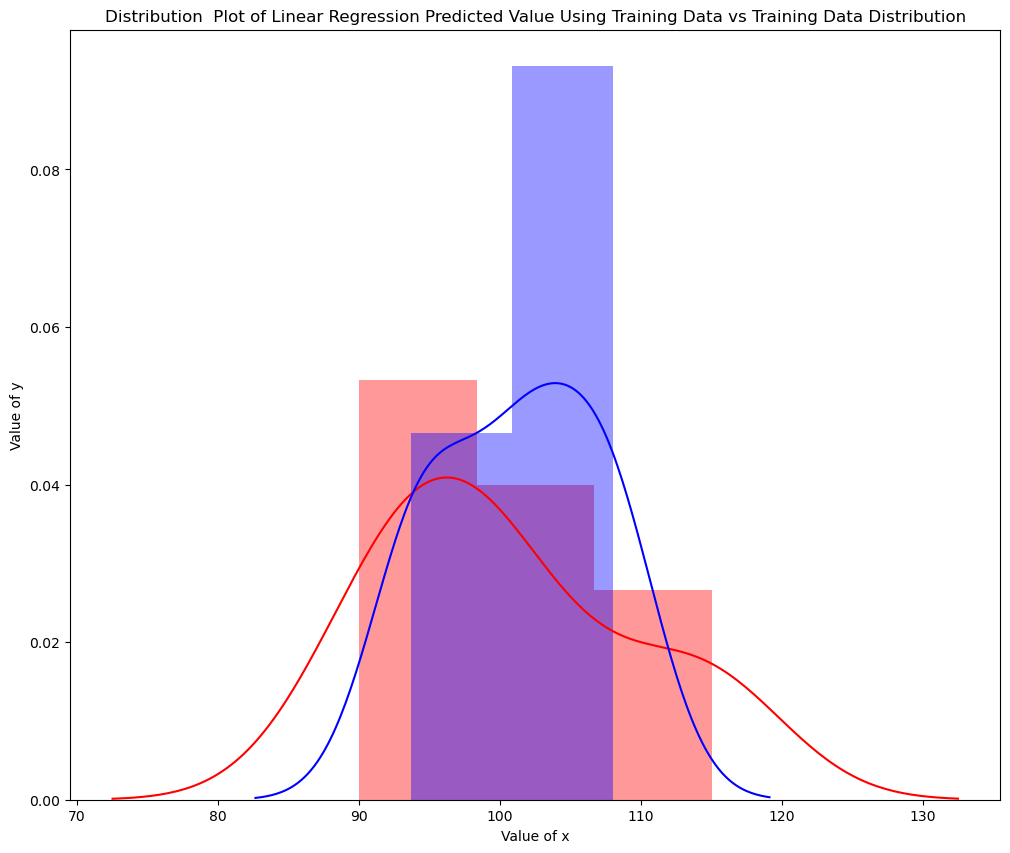

In [31]:
Title = 'Distribution  Plot of Linear Regression Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\Valentina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valentina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


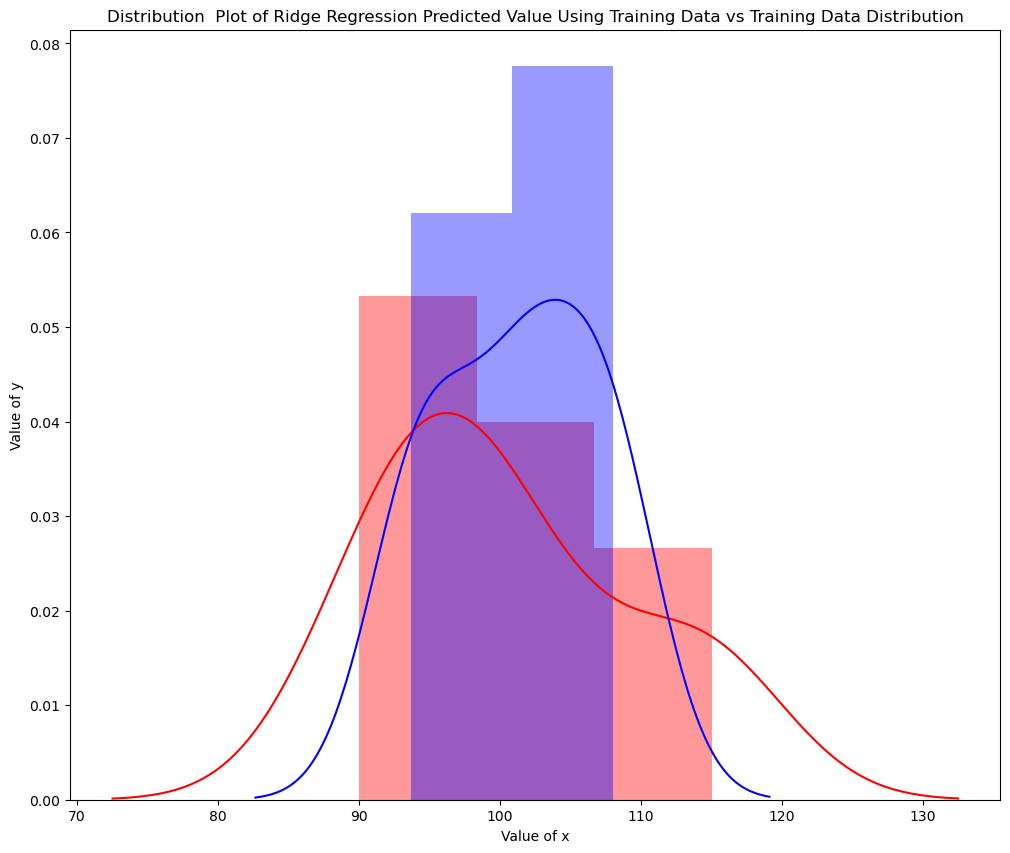

In [32]:
Title = 'Distribution  Plot of Ridge Regression Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_predR, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\Valentina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valentina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


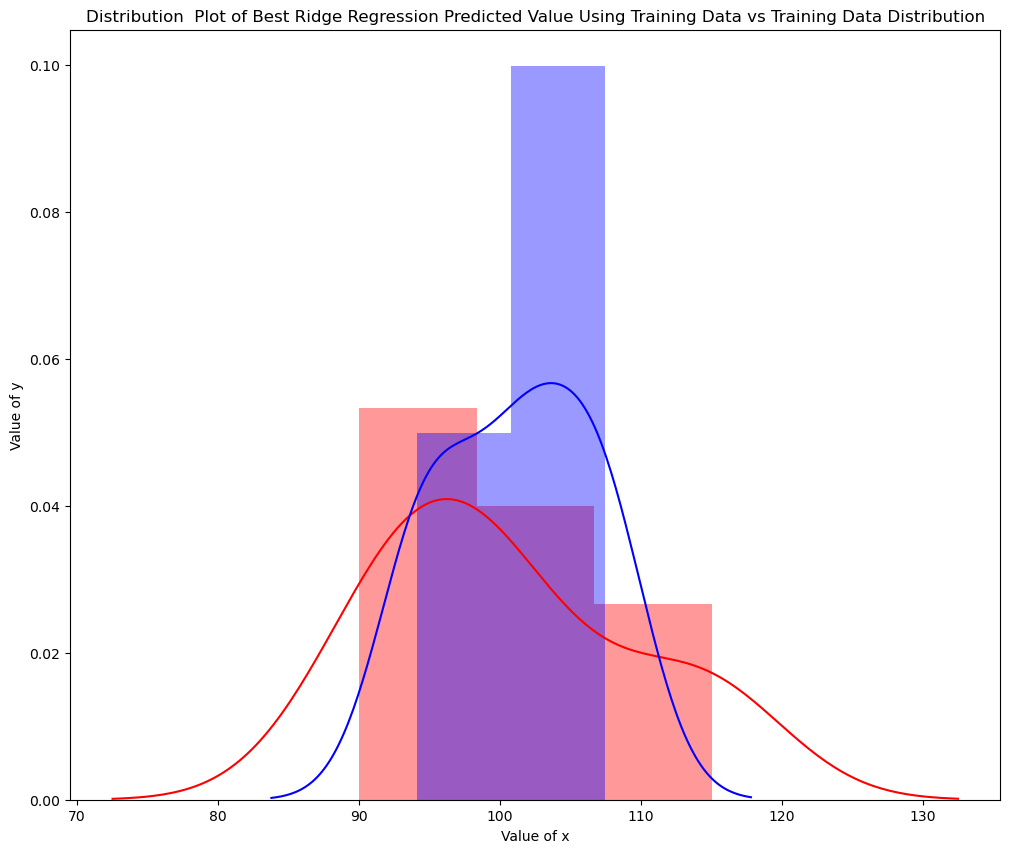

In [33]:
Title = 'Distribution  Plot of Best Ridge Regression Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_predG, "Actual Values (Train)", "Predicted Values (Train)", Title)